<img src=https://i1.wp.com/www.asisedice.tv/oa8z6yajc/2019/01/Dv_sQ8dU8AABucY.jpg>

* **Nombre**: Cesar Domingo Hernandez Esperilla
* **email**: cesardhdez@hotmail.com
* **nro.telf**: 5565077120
* **Fecha:** 28/11/2021

# 1. Introducción

Este estudio se ha elaborado con los datos facilitados por la Agencia Digital de la Innovacion publica  del Gobierno de la Ciudad de Mexico a traves del siguiente enlace:

https://geopandas.org/en/stable/gallery/plotting_with_folium.html

En el presente trabajo se pretende dar respuesta a una serie de preguntas planteadas  el Grupo Elektra y finalmente se llega a una serie de conclusiones.

Tras realizar un pre procesado de los datos podemos observar que las tres alcaldias con mas delitos son CUAUHTEMOC, IZTAPALAPA y GUSTAVO MADERO y se proporciona una tabla con los delitos mas comunes por cada una de las 558 alcaldias.

Ademas se observa una tendencia estacional en el comportamiento del delincuente, siendo el viernes de quincena a las 12 am el momento de mayor actividad.

Si comparamos 2020 vs 2019  observamos que la modalidad de ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO) ha sido el delito que mas ha crecido y el ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO) el que mas ha descendido. Basicamente los robos siguen en auge pero ha cambiado el modo de operar.

Se propone un indicador de seguridad pero deberia ser implementado para conocer su precision.
Finalmente se incluyen una serie de graficos con las tendencias anteriormente descritas y se incluye un mapa de geolocalizacion con las ubicaciones donde se han producido los feminicidios en CDMX.



# 1. Abstract


This study has been prepared with the data provided by the Digital Agency for Public Innovation of the Government of Mexico City through the following link:

https://geopandas.org/en/stable/gallery/plotting_with_folium.html

In this paper, the intention is to answer a series of questions posed by the Elektra Group and finally a series of conclusions is reached.

After pre-processing the data, we can see that the three municipalities with the most crimes are CUAUHTEMOC, IZTAPALAPA and GUSTAVO MADERO, and a table is provided with the most common crimes for each of the 558 municipalities.

In addition, there is a seasonal trend in the behavior of the offender, with Friday of the fortnight at 12 am being the time of greatest activity.

If we compare 2020 vs 2019, we observe that the form of THEFT FROM A BUSINESS WITHOUT VIOLENCE BY LIGHTHOUSES (SELF-SERVICE SHOPS) has been the crime that has grown the most and ROBBERY FROM A BUSINESS WITHOUT VIOLENCE BY LIGHTHOUSES (SELF-SERVICE STORES) the one that has decreased the most. Basically thefts are still on the rise but the way of operating has changed.

A security indicator is proposed but should be implemented to know its accuracy.
Finally, a series of graphs with the trends described above are included and a geolocation map is included with the locations where femicides have occurred in CDMX.

# 2. Importar librerias , cargar datos e inspeccion inicial

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
datos = pd.read_csv("carpetas_completa_septiembre_2021.csv")

C:\Users\cesar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Inspeccion inicial



In [3]:
#Observamos que el dataset posee 1,307,211 filas y 19 columnas
print(datos.shape)

(1307211, 19)


In [4]:
#Hay datos que se repiten
datos.head(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN


In [5]:
#Existen datos que deben ser recategorizados
datos.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

# 3.  ¿Cuantos datos faltantes hay por cada columna? 
# En caso de que los consideres necesario ¿Como completarias los datos faltantes de las distintas columnas?

1.- Existen variables que poseen > 50% de valores perdidos. Estas variables seran eliminadas por faltar demasiada informacion:

* calle_hechos2 : 61% NaN
* competencia   : 81% NaN
* tempo         : 100% NaN

2.- Otros valores NaN pasaran a tener la categoria "Desconocido":

* unidad_investigacion : 227 NaN
* calle_hechos : 3266 NaN
* colonia_hechos : 54658 NaN
* alcaldia_hechos : 3779 NaN

3.- Se observan pocos valores que serian imputados por la moda porque se estima que los delitos con 'fecha_inicio' y 'fecha_hechos' tienen una mayor probabilidad de cometerse en los annos con tasas de crimen mas elevadas. La misma logica es aplicada para la variable fiscalia.

* fecha_inicio : 3 NaN
* fecha_hechos : 444 NaN
* fiscalia : 2 NaN

4.- Las variables 'fecha_'  pasaran a recategorizarse como datetime para posteriormente descomponerse en dia, semana, mes y anno.

5.-  Por ultimo las variables longitud y latitud se imputan por la moda por el mismo motivo. Es mas probable que los delitos se hayan cometido en las areas mas conflictivas frente a otras con menos actividad delictiva. Esta impiutacion por la moda supone menos del 5% de los casos.

* longitud : 53702 NaN
* latitud : 53702 NaN


#### 3.1 Recuento de valores nulos


In [6]:
print(datos.isna().sum())

ao_hechos                   444
mes_hechos                  444
fecha_hechos                444
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  3
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               3266
calle_hechos2            799555
colonia_hechos            54658
alcaldia_hechos            3779
competencia             1064079
longitud                  53702
latitud                   53702
tempo                   1307211
dtype: int64


#### 3.2 Eliminacion de variables con > 50% de valores perdidos:


In [7]:
# Demasiados valores perdidos ( >50%)
datos.drop(columns = ["calle_hechos2"], inplace = True)
datos.drop(columns = ["competencia"], inplace = True)
datos.drop(columns = ["tempo"], inplace = True)

#### 3.3 Sustitucion de valores NA por Desconocido:

In [8]:
datos["unidad_investigacion"] = datos["unidad_investigacion"].replace(np.nan, "Desconocido")
datos["calle_hechos"] = datos["calle_hechos"].replace(np.nan, "Desconocido")
datos["colonia_hechos"] = datos["colonia_hechos"].replace(np.nan, "Desconocido")
datos["alcaldia_hechos"] = datos["alcaldia_hechos"].replace(np.nan, "Desconocido")

#### 3.4 Sustitucion de valores NA por la Moda:

Valores NA: fecha de inicio


In [9]:
#Identificamos los tres valores que seran sustituidos por la moda:
datos[datos['fecha_inicio'].isnull()]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
1168281,2020.0,Agosto,2020-08-12 16:45:00,2020,Agosto,NaN,FEMINICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-8,UI-2SD,HOMICIDIO DOLOSO,CALLE NORTE 82 A,GERTRUDIS SÁNCHEZ 2A SECCIÓN,GUSTAVO A MADERO,-99.101234,19.466268
1168282,2020.0,Octubre,2020-10-01 06:20:00,2020,Octubre,NaN,PLAGIO O SECUESTRO,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO,E,1 CON DETENIDO 1 C/D,SECUESTRO,SE DESCONOCE,Desconocido,AZCAPOTZALCO,NaN,NaN
1168283,2020.0,Octubre,2020-10-26 19:45:00,2020,Octubre,NaN,FEMINICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN TLALPAN,TLP-3,UI-2CD,HOMICIDIO DOLOSO,SEGUNDA CERRADA DE TECALTITLA,LA GUADALUPANA,TLALPAN,-99.149103,19.194419


In [10]:
#Procedemos a sustituir los valores NA por la moda.
datos['fecha_inicio']=datos['fecha_inicio'].fillna(datos['fecha_inicio'].mode()[0])

Valores NA: fiscalia

In [11]:
#Identificamos los tres valores que seran sustituidos por la moda:
datos[datos['fiscalia'].isnull()]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
971692,2020.0,Febrero,2020-02-11 08:40:00,2020,Febrero,2020-02-11 08:40:00,SECUESTRO,NaN,C,Desconocido,PLAGIO O SECUESTRO,Desconocido,SANTIAGO TULYEHUALCO - PUEBLO,XOCHIMILCO,-99.012287,19.252778
971693,2020.0,Febrero,2020-02-21 00:00:00,2020,Febrero,2020-02-22 13:45:00,HOMICIDIO DOLOSO,NaN,MH-4,Desconocido,FEMINICIDIO,Desconocido,COVE,ALVARO OBREGON,NaN,NaN


In [12]:
# Observamos el valor que mas se repite
datos['fiscalia'].value_counts().head(1)

INVESTIGACIÓN EN IZTAPALAPA    114947
Name: fiscalia, dtype: int64

In [13]:
#Procedemos a sustituir los valores NA por la moda.
datos["fiscalia"] = datos["fiscalia"].replace(np.nan, "INVESTIGACIÓN EN IZTAPALAPA")

#### 3.5 Modificacion variable fecha:

In [14]:
# 1) Eliminamos las variables mes y anno porque las obtendremos de forma numerica al convertir la fecha en una variable datetime.
datos.drop(['ao_hechos', 'mes_hechos','ao_inicio','mes_inicio'], axis = 'columns', inplace=True)

# 2) Los valores de fecha_hechos en NA los imputaremos por la moda
datos['fecha_hechos']=datos['fecha_hechos'].fillna(datos['fecha_hechos'].mode()[0])

#3) Convertimos las fechas en formato datetime
datos['fecha_hechos'] = pd.to_datetime(datos['fecha_hechos'])
datos['fecha_inicio'] = pd.to_datetime(datos['fecha_inicio'])

#4) Descomponemos las fechas en hora,dia, semana, mes, anno
datos['hora_hechos'] = datos['fecha_hechos'].dt.hour
datos['dia_hechos'] = datos['fecha_hechos'].dt.day
datos['dia_sem_hechos'] = datos['fecha_hechos'].dt.weekday
datos['semana_hechos'] = datos['fecha_hechos'].dt.week
datos['mes_hechos'] = datos['fecha_hechos'].dt.month
datos['anno_hechos'] = datos['fecha_hechos'].dt.year


datos['hora_inicio'] = datos['fecha_inicio'].dt.hour
datos['dia_inicio'] = datos['fecha_inicio'].dt.day
datos['semana_inicio'] = datos['fecha_inicio'].dt.week
datos['mes_inicio'] = datos['fecha_inicio'].dt.month
datos['anno_inicio'] = datos['fecha_inicio'].dt.year

<ipython-input-14-6e54c4d20182>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  datos['semana_hechos'] = datos['fecha_hechos'].dt.week
<ipython-input-14-6e54c4d20182>:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  datos['semana_inicio'] = datos['fecha_inicio'].dt.week


#### 3.6 Imputacion variable latitud y longitud:

In [15]:
datos['latitud']=datos['latitud'].fillna(datos['latitud'].mode()[0])
datos['longitud']=datos['longitud'].fillna(datos['longitud'].mode()[0])

#### 3.7 Valores NaN 
Comprobamos que no existen valores NaN

In [16]:
print(datos.isna().sum())

fecha_hechos            0
fecha_inicio            0
delito                  0
fiscalia                0
agencia                 0
unidad_investigacion    0
categoria_delito        0
calle_hechos            0
colonia_hechos          0
alcaldia_hechos         0
longitud                0
latitud                 0
hora_hechos             0
dia_hechos              0
dia_sem_hechos          0
semana_hechos           0
mes_hechos              0
anno_hechos             0
hora_inicio             0
dia_inicio              0
semana_inicio           0
mes_inicio              0
anno_inicio             0
dtype: int64


# 4. ¿Cuales son los delitos mas comunes por alcaldia?

Existen 558 alcaldias distintas que presentan hechos delictivos siendo las de mayor incidencia Cuauhtemoc, Iztapalapa y Gustavo Madero.

A continuacion se muestra un listado con los principales delitos para cada una de las diferentes alcaldias.

In [17]:
len(datos['alcaldia_hechos'].unique())

558

In [18]:
datos['alcaldia_hechos'].value_counts().head(20)

CUAUHTEMOC                203425
IZTAPALAPA                196158
GUSTAVO A MADERO          131319
BENITO JUAREZ             107516
ALVARO OBREGON             88946
COYOACAN                   87401
MIGUEL HIDALGO             84626
TLALPAN                    76792
VENUSTIANO CARRANZA        75034
AZCAPOTZALCO               63570
IZTACALCO                  54310
XOCHIMILCO                 41203
TLAHUAC                    32444
LA MAGDALENA CONTRERAS     21513
CUAJIMALPA DE MORELOS      19527
MILPA ALTA                  9561
Desconocido                 3779
NEZAHUALCOYOTL              1400
TLALNEPANTLA DE BAZ         1101
ECATEPEC DE MORELOS         1024
Name: alcaldia_hechos, dtype: int64

Tabla con delitos mas comunes por alcaldia

In [19]:
alcaldias = datos.groupby(['alcaldia_hechos','delito'])
alcaldias.first()

fecha_hechos  \
alcaldia_hechos delito                                                                   
ABALA           DENUNCIA DE HECHOS                                 2016-01-08 12:00:00   
ACAMBARO        PRIVACION DE LA LIBERTAD PERSONAL                  2019-04-21 16:00:00   
                VIOLACION                                          2020-11-20 20:00:00   
                VIOLENCIA FAMILIAR                                 2020-08-11 09:12:00   
ACAMBAY         ABUSO SEXUAL                                       2019-06-20 14:00:00   
...                                                                                ...   
ZUMPANGO        ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO... 2017-01-26 10:30:00   
                SUSTRACCION DE MENORES                             2016-08-06 18:00:00   
                USURPACIÓN DE IDENTIDAD                            2016-08-20 15:00:00   
                VIOLACION EQUIPARADA                               2021-06-20 09:30:00   
                VIOLENCIA FAMILIAR                                 2016-06-11 14:00:00   

                                                                          fecha_inicio  \
alcaldia_hechos delito                                                                   
ABALA           DENUNCIA DE HECHOS                                 2016-01-08 20:09:01   
ACAMBARO        PRIVACION DE LA LIBERTAD PERSONAL                  2019-04-30 11:59:08   
                VIOLACION                                          2021-04-23 19:34:48   
                VIOLENCIA FAMILIAR                                 2020-08-13 09:52:03   
ACAMBAY         ABUSO SEXUAL                                       2019-07-30 16:56:15   
...                                                                                ...   
ZUMPANGO        ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO... 2017-01-27 15:38:46   
                SUSTRACCION DE MENORES                             2016-10-05 18:56:02   
                USURPACIÓN DE IDENTIDAD                            2016-12-05 15:19:47   
                VIOLACION EQUIPARADA                               2021-06-21 15:18:36   
                VIOLENCIA FAMILIAR                                 2016-06-11 18:31:23   

                                                                                                             fiscalia  \
alcaldia_hechos delito                                                                                                  
ABALA           DENUNCIA DE HECHOS                                  INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...   
ACAMBARO        PRIVACION DE LA LIBERTAD PERSONAL                   INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE S...   
                VIOLACION                                               FISCALÍA DE INVESTIGACIÓN DE DELITOS SEXUALES   
                VIOLENCIA FAMILIAR                                  FISCALÍA DE INVESTIGACIÓN DE DELITOS COMETIDOS...   
ACAMBAY         ABUSO SEXUAL                                        INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...   
...                                                                                                               ...   
ZUMPANGO        ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO...                    INVESTIGACIÓN EN MIGUEL HIDALGO   
                SUSTRACCION DE MENORES                              INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...   
                USURPACIÓN DE IDENTIDAD                                               INVESTIGACIÓN EN MIGUEL HIDALGO   
                VIOLACION EQUIPARADA                                    FISCALÍA DE INVESTIGACIÓN DE DELITOS SEXUALES   
                VIOLENCIA FAMILIAR                                  INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...   

                                                                      agencia  \
alcaldia_hechos delito                                                       

# 5.   ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, dia de la semana, etc)? 
# Si es asi ¿a que crees que se deba?


#### Resumen:

**El periodo estacional donde se presentan mas delitos suele ser los "viernes de quincena" en el tramo de las 10:00 a las 12:00**

* Tendencia segun la hora del delito:
El mayor repunte de delitos se suele producir en el tramo comprendido desde las 10:00 hasta las 12:00 para y posteriormente se onbserva un ligero descenso hasta las 21:00. Es por tanto en este tramo de 12 horas ( 10:00 - 21:00) cuando se producen el 70% de los delitos.

* Tendencia segun el dia del delito:
Los dias 1 y 15 son los que presentan mayor tasa de delito. Esto puede ser debido a que suelen ser los dias de cobro de la nomina.

* Tendencia segun el dia de la semana:
El viernes se muestra como el dia de la semana mas conflictivo y el domingo mas relajado. Esto sumado a la tendencia anterior del dia del delito, parece indicar que el "Viernes de quincena" es particularmente propenso a que se produzca un delito.

El motivo por el cual el domingo pudiera ser el dia mas tranquilo es que suele ser un dia festivo que suele disfrutarse en familia y en un ambiente mas relajado y por tanto la posible victima no se encuentra sola y no permanece tanto tiempo en la calle.

* Tendencia segun la semana y el mes:
Marzo y agosto se presentan como los meses mas conflictivos y noviembre y diciembre los mas pacificos. Se necesitaria realizar un estudio mas detallado del motivo por el cual cerca de la Navidad se preentan menos delitos.


Tendencia de los delitos segun la hora

In [20]:
# Agrupamos las horas

datos['hora_hechos2'] = datos['hora_hechos']
datos['hora_hechos'] = datos['hora_hechos'].replace([1,2,3], '1-3')
datos['hora_hechos'] = datos['hora_hechos'].replace([4,5,6], '4-6')
datos['hora_hechos'] = datos['hora_hechos'].replace([7,8,9], '7-9')
datos['hora_hechos'] = datos['hora_hechos'].replace([10,11,12], '10-12')
datos['hora_hechos'] = datos['hora_hechos'].replace([13,14,15], '13-15')
datos['hora_hechos'] = datos['hora_hechos'].replace([16,17,18], '16-18')
datos['hora_hechos'] = datos['hora_hechos'].replace([19,20,21], '19-21')
datos['hora_hechos'] = datos['hora_hechos'].replace([22,23,0], '22-24')

# Calculamos el % de inciencia por grupo horario
hora = datos['hora_hechos'].value_counts() / len(datos['hora_hechos']) * 100
hora = round(hora,2)

hora

10-12    24.13
13-15    16.16
16-18    14.71
19-21    14.37
7-9      11.40
22-24     9.05
4-6       5.25
1-3       4.94
Name: hora_hechos, dtype: float64

In [21]:
hora2 = datos['hora_hechos2'].value_counts() / len(datos['hora_hechos2']) * 100
hora2 = round(hora2,2)
hora2

12    12.32
10     6.58
14     5.51
15     5.50
11     5.23
13     5.16
20     5.07
16     5.06
18     4.88
19     4.84
17     4.77
9      4.60
21     4.45
8      3.71
22     3.70
7      3.08
23     2.90
0      2.44
6      2.29
1      1.78
5      1.63
2      1.61
3      1.55
4      1.33
Name: hora_hechos2, dtype: float64

Tendencia de los delitos segun el dia del mes

In [22]:
dia = datos['dia_hechos'].value_counts() / len(datos['dia_hechos']) * 100
dia = round(dia,2)

print(dia.head(2))
print(dia.tail(2))

1     3.98
15    3.70
Name: dia_hechos, dtype: float64
29    2.93
31    1.80
Name: dia_hechos, dtype: float64


Tendencia de los delitos segun el dia de la semana.
Donde el lunes está indexado como 0 y el domingo como 6

In [23]:
diasem = datos['dia_sem_hechos'].value_counts() / len(datos['dia_sem_hechos']) * 100
diasem = round(diasem,2)
diasem

4    15.54
0    15.00
2    14.98
1    14.87
3    14.76
5    13.04
6    11.80
Name: dia_sem_hechos, dtype: float64

Tendencia del delito segun la semana

In [24]:
semana = datos['semana_hechos'].value_counts() / len(datos['semana_hechos']) * 100
semana = round(semana,2)
print(semana.head(2))
print(semana.tail(2))

9     2.21
11    2.13
Name: semana_hechos, dtype: float64
52    1.42
53    0.44
Name: semana_hechos, dtype: float64


Tendencia del delito segun el mes

In [25]:
mes = datos['mes_hechos'].value_counts() / len(datos['mes_hechos']) * 100
mes = round(mes,2)
print(mes.head(2))
print(mes.tail(2))

3    9.09
8    8.87
Name: mes_hechos, dtype: float64
11    7.49
12    7.24
Name: mes_hechos, dtype: float64


# 6. Identifica los delitos que van a la alza y a la baja en la CDMX, ten cuidado con los delitos que tienen pocas ocurrencias


Se observa un incremento en la modalidad de robo llamada 'ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS'. Esto consiste en ocultar los objetos escondiendolos en la ropa. Los resultados obtenidos concuerdan con las noticias publicadas.

https://ddmbj.mx/aumenta-el-robo-hormiga-en-tiendas-de-autoservicio-hasta-un-116-por-ciento-en-la-cdmx

Se compara los annos 2020 vs 2019 debido a que estos son los ultimos annos completos publicados.
Los delitos que presentan mayor incremento en 2020 vs 2019 son:

- ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)
- VIOLENCIA FAMILIAR
- ENCUBRIMIENTO

Y aquellos que mas han descendido frente al anno anterior son: 

- ROBO A NEGOCIO SIN VIOLENCIA
- ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
- ROBO DE OBJETOS


In [26]:
#Filtro 2020
delitosfiltro2020 = datos[datos['anno_hechos'] == 2020] 
delitosfiltro2020 = delitosfiltro2020['delito'].value_counts()

#Filtro 2019
delitosfiltro2019 = datos[datos['anno_hechos'] == 2019] 
delitosfiltro2019 = delitosfiltro2019['delito'].value_counts()

#Diferencia
delitosfiltro = delitosfiltro2020 - delitosfiltro2019
delitosfiltro_desc = delitosfiltro.sort_values(ascending = True)
delitosfiltro_asc = delitosfiltro.sort_values(ascending = False)

In [27]:
# Top 3 Delitos con mayor crecimiento
delitosfiltro_asc.head(3)

ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)    6133.0
VIOLENCIA FAMILIAR                                                     2319.0
ENCUBRIMIENTO                                                          1711.0
Name: delito, dtype: float64

In [28]:
# Top3 Delitos con mayor descenso
delitosfiltro_desc.head(3)

ROBO A NEGOCIO SIN VIOLENCIA                     -11304.0
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA    -4718.0
ROBO DE OBJETOS                                   -3390.0
Name: delito, dtype: float64

# 7.  Con los datos disponibles trata de disenar un indicador de inseguridad. Generalo al nivel de desagregacion que te parezca mas adecuado (calle, alcaldia, coordenadas, etc).

# No necesitas implementar este indicador, pero debes dar una forma concreta de como medir la inseguridad.

Existen diferentes variables que hemos observado que influyen cuando se produce un delito:


* 1) ubicacion:Podemos obtener un indicador con (datos['alcaldia_hechos'].value_counts() / datos.shape[0])*100
* 2) hora:Sabemos que hay tramos horarios que se producen mayores delitos obteniendo su %
* 3) dia:Los dias 1 y 15 tienen una mayor probabilidad de que se produzca un delito frente a otro.
* 4) dia de la semana: Los viernes es un dia clave y debera tenerse en cuenta. Hemos calculado su importancia anteriormente.

Para crear este indice crearemos una nueva variable en el dataset con el resultado de la suma de los valores x1,x2,x3,x4 para cada uno de los registros.

Se necesitaria implementar este indicador y ajustar los pesos de x1,x2,x3 y x4 en funcion de la importancia

Por tanto un primer boceto de indice podria ser :

#### _Indice = x1* ubicacion + x2* hora + x3 * dia + x4 * dia de la semana_


# 8.  Una persona fue victima de un delito recientemente, dado que sabes que el delito sucedio en Tlalpan.

# ¿cual es la probabilidad de que la persona haya sufrido un incidente reportado como ROBO DE OBJETOS?

Para la alcaldia de Tlalpan la probabilidad de que el incidente sea reportado como 'ROBO DE OBJETOS' es de 6.11%

In [29]:
#Creamos una mascara para seleccionar solo aquellos registros en la alcaldia de Tlalpan

mascara_tlalpan = datos['alcaldia_hechos']=="TLALPAN"
tlalpan = datos[mascara_tlalpan]

# Realizamos un filtro dentro de Tlalpan donde solo se han cometido la modalidad 'ROBO DE OBJETOS'
tlalpan_robo = tlalpan[tlalpan['delito']== 'ROBO DE OBJETOS']

# la probabilidad sera = (Evento robo de objetos / Eventos totales) * 100

probabilidad = (tlalpan_robo.shape[0] / tlalpan.shape[0])*100
probabilidad = round(probabilidad,2)
print(probabilidad)

6.11


# 9.  Con los datos disponibles haz una o varias visualizaciones que consideres adecuadas o pertinentes.

# Hint: tienes la latitud y longitud de cada incidente.

#### Top 10 delitos mas frecuentes

In [30]:
#Convertimos a dataframe
df = pd.DataFrame(delitosfiltro_asc)
#Incluimos ID
df["ID"]=np.arange(1,len(df)+1)
df['tipo']=df.index
df.index=df['ID']
df = df[["tipo", "delito"]]
df = df.iloc[0:10]


Text(0.5, 1.0, 'Top 10 delitos mas frecuentes')

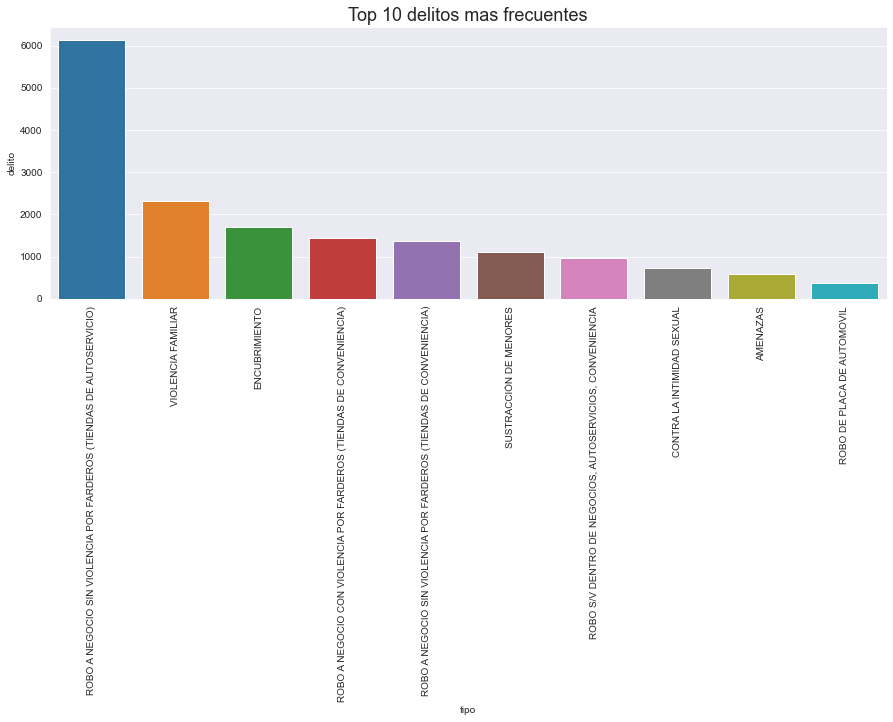

In [31]:
plt.figure (figsize = (15,5))
sns.set_style('darkgrid')
sns.barplot ( data = df, x = 'tipo', y = 'delito');
plt.xticks(rotation=90)
plt.title("Top 10 delitos mas frecuentes", fontsize=18)

#### Horas con mayor frecuencia de delito

In [32]:
df_hora = pd.DataFrame(hora2)

In [33]:
df_hora
df_hora["ID"]=np.arange(1,len(df_hora)+1)
df_hora['hora']=df_hora.index
df_hora['% delitos']=df_hora['hora_hechos2']
df_hora=df_hora[['hora','% delitos']]


In [34]:
df_hora = df_hora.sort_values('hora')


#### Dias del mes con mayor frecuencia de delito

In [35]:
df_dia = pd.DataFrame(dia)
df_dia["ID"]=np.arange(1,len(df_dia)+1)
df_dia['dia']=df_dia.index
df_dia.index=df_dia['ID']
df_dia['% delitos'] = df_dia['dia_hechos']
df_dia = df_dia[['dia','% delitos']]


In [36]:
df_dia = df_dia.sort_values('dia')


#### Dias del la semana con mayor frecuencia de delito

In [37]:
df_diasem = pd.DataFrame(diasem)
df_diasem["ID"]=np.arange(1,len(df_diasem)+1)
df_diasem['dia']=df_diasem.index
df_diasem.index=df_diasem['ID']
df_diasem['% delitos'] = df_diasem['dia_sem_hechos']
df_diasem = df_diasem[['dia','% delitos']]


In [38]:
df_diasem = df_diasem.sort_values('dia')
df_diasem.index=df_diasem['dia']


In [39]:
df_diasem['dia'] = df_diasem['dia'].replace([0], 'Lun')
df_diasem['dia'] = df_diasem['dia'].replace([1], 'Mar')
df_diasem['dia'] = df_diasem['dia'].replace([2], 'Mie')
df_diasem['dia'] = df_diasem['dia'].replace([3], 'Jue')
df_diasem['dia'] = df_diasem['dia'].replace([4], 'Vie')
df_diasem['dia'] = df_diasem['dia'].replace([5], 'Sab')
df_diasem['dia'] = df_diasem['dia'].replace([6], 'Dom')

#### Graficas frecuencia de delito segun hora, dia de la semana o dia del mes

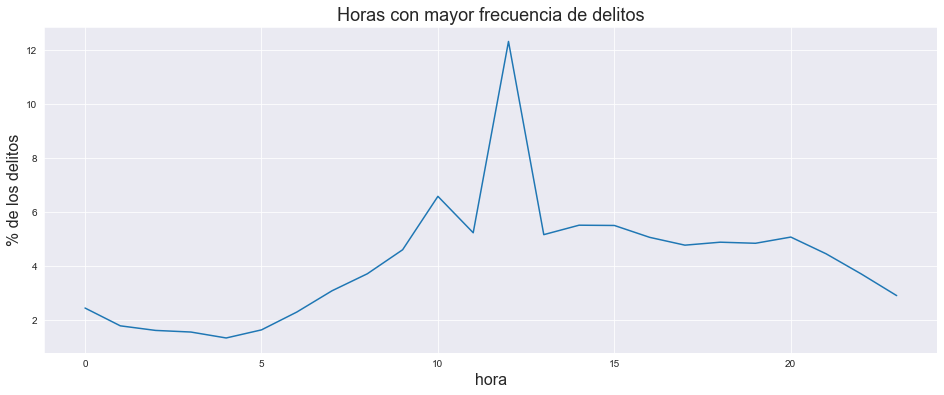

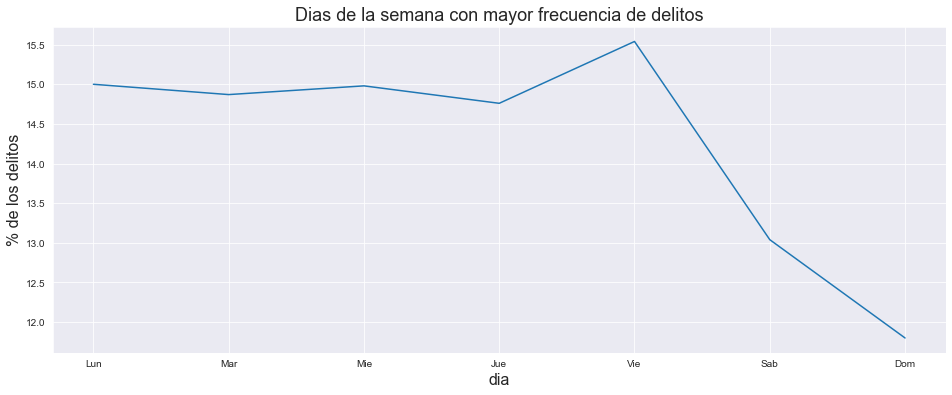

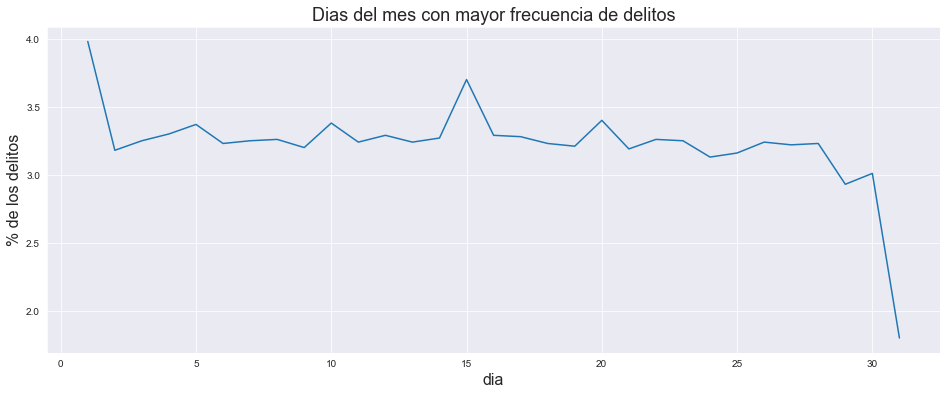

In [40]:
#Graficos para las horas

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.xlabel('hora',fontsize=16)
plt.ylabel('% de los delitos',fontsize=16)
plt.title("Horas con mayor frecuencia de delitos", fontsize=18)
  
plt.plot(df_hora['hora'], df_hora['% delitos'])
plt.show()

#Graficos para los dias de la semana
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.xlabel('dia',fontsize=16)
plt.ylabel('% de los delitos',fontsize=16)
plt.title("Dias de la semana con mayor frecuencia de delitos", fontsize=18)
  
plt.plot(df_diasem['dia'], df_diasem['% delitos'])
plt.show()

#Graficos para los dias del mes
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.xlabel('dia',fontsize=16)
plt.ylabel('% de los delitos',fontsize=16)
plt.title("Dias del mes con mayor frecuencia de delitos", fontsize=18)
  
plt.plot(df_dia['dia'], df_dia['% delitos'])
plt.show()

### Mapa con la ubicacion de lo Feminicidios ocurridos en CDMX

In [60]:
import folium

In [61]:
datos_mapa = datos[["latitud", "longitud", "delito"]]
datos_mapa = datos_mapa.iloc[0:10]

In [62]:
map = folium.Map(location=[datos_mapa.latitud.mean(), datos_mapa.longitud.mean()], zoom_start=14, control_scale=True)

In [63]:
for index, location_info in datos_mapa.iterrows():
    folium.Marker([location_info["latitud"], location_info["longitud"]], popup=location_info["delito"]).add_to(map)

In [64]:
filtro2020_feminicidio = datos[datos['delito'] == 'FEMINICIDIO']

In [65]:
for index, location_info in filtro2020_feminicidio.iterrows():
    folium.Marker([location_info["latitud"], location_info["longitud"]], popup=location_info["delito"]).add_to(map)

In [66]:
map